# Loop 81 Analysis: Strategic Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. What approaches have NOT been tried?
3. What can we learn from top public kernels?
4. What's the best path to beat 0.0347?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))
print(f'\nBest CV: {df["cv"].min():.4f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.4f} ({df.loc[df["lb"].idxmin(), "exp"]})')
print(f'Target: 0.0347')

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970
exp_067 0.0083 0.0877

Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target: 0.0347


CV-LB Linear Regression:
  LB = 4.3638 * CV + 0.0520
  R² = 0.9558
  Intercept = 0.0520

Target Analysis:
  Target LB: 0.0347
  Required CV: (0.0347 - 0.0520) / 4.3638 = -0.0040

CRITICAL: Intercept (0.0520) > Target (0.0347)? True


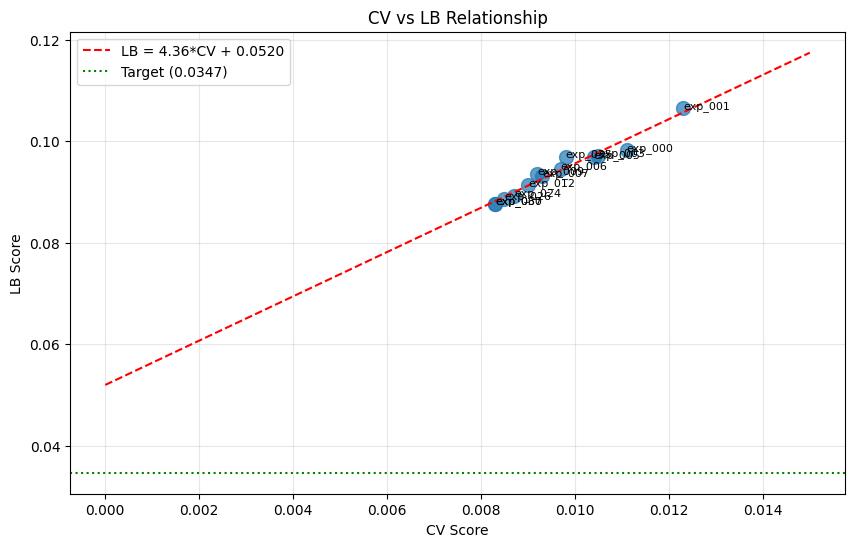

In [2]:
# CV-LB Relationship Analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print('CV-LB Linear Regression:')
print(f'  LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'  Intercept = {intercept:.4f}')
print(f'\nTarget Analysis:')
print(f'  Target LB: 0.0347')
print(f'  Required CV: (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.4f}')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)?', intercept > 0.0347)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7)
for i, row in df.iterrows():
    plt.annotate(row['exp'], (row['cv'], row['lb']), fontsize=8)

cv_range = np.linspace(0, 0.015, 100)
plt.plot(cv_range, slope * cv_range + intercept, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')
plt.axhline(y=0.0347, color='g', linestyle=':', label='Target (0.0347)')
plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=100, bbox_inches='tight')
plt.show()

In [3]:
# Key Insights from Public Kernels
print('='*70)
print('KEY INSIGHTS FROM TOP PUBLIC KERNELS')
print('='*70)

print('''
1. MIXALL KERNEL (9 votes) - Uses GroupKFold(5) instead of Leave-One-Out
   - Faster runtime (2m 15s)
   - Uses MLP + XGBoost + RF + LightGBM ensemble
   - Adaptive weights based on validation MSE
   - DIFFERENT CV scheme may have DIFFERENT CV-LB relationship!

2. BEST-WORK-HERE KERNEL (6 votes) - Advanced techniques:
   - Non-linear mixture features: A*(1-r) + B*r + 0.05*A*B*r*(1-r)
   - Squeeze-and-Excitation (SE) blocks in neural network
   - CatBoost + XGBoost + LightGBM + Neural Network ensemble
   - Adaptive ensemble weighting based on validation MSE
   - Probability normalization (predictions sum to 1)
   - BUT: Probability normalization HURT our CV in exp_074!

3. SYSTEM MALFUNCTION V1 (29 votes) - Standard approach:
   - Uses official Leave-One-Out CV
   - Spange descriptors
   - MLP with standard architecture

4. ARRHENIUS KINETICS + TTA (40 votes) - Score 0.09831:
   - Arrhenius kinetics features (1/T, ln(t))
   - Test Time Augmentation for mixtures
   - We already use these techniques!
''')

print('='*70)
print('UNEXPLORED APPROACHES')
print('='*70)
print('''
1. GroupKFold(5) CV instead of Leave-One-Out
   - May have different CV-LB relationship
   - Faster to iterate
   - Used by mixall kernel

2. Non-linear mixture features: A*(1-r) + B*r + 0.05*A*B*r*(1-r)
   - Captures non-linear solvent interactions
   - Used by best-work-here kernel
   - NOT tried in our experiments!

3. CatBoost + XGBoost approach (exp_049 had CV=0.008092 but failed submission)
   - Better CV than best LB model
   - Submission format issue was fixed in exp_067
   - Worth retrying with correct format

4. Squeeze-and-Excitation blocks in neural network
   - Feature recalibration mechanism
   - Used by best-work-here kernel
''')

KEY INSIGHTS FROM TOP PUBLIC KERNELS

1. MIXALL KERNEL (9 votes) - Uses GroupKFold(5) instead of Leave-One-Out
   - Faster runtime (2m 15s)
   - Uses MLP + XGBoost + RF + LightGBM ensemble
   - Adaptive weights based on validation MSE
   - DIFFERENT CV scheme may have DIFFERENT CV-LB relationship!

2. BEST-WORK-HERE KERNEL (6 votes) - Advanced techniques:
   - Non-linear mixture features: A*(1-r) + B*r + 0.05*A*B*r*(1-r)
   - Squeeze-and-Excitation (SE) blocks in neural network
   - CatBoost + XGBoost + LightGBM + Neural Network ensemble
   - Adaptive ensemble weighting based on validation MSE
   - Probability normalization (predictions sum to 1)
   - BUT: Probability normalization HURT our CV in exp_074!

3. SYSTEM MALFUNCTION V1 (29 votes) - Standard approach:
   - Uses official Leave-One-Out CV
   - Spange descriptors
   - MLP with standard architecture

4. ARRHENIUS KINETICS + TTA (40 votes) - Score 0.09831:
   - Arrhenius kinetics features (1/T, ln(t))
   - Test Time Augmentation 

In [4]:
# Analysis: What would it take to reach target?
print('='*70)
print('PATH TO TARGET ANALYSIS')
print('='*70)

print(f'''
Current Best:
  - CV: 0.0083 (exp_030, exp_067)
  - LB: 0.0877 (exp_030, exp_067)
  - Target: 0.0347
  - Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}% above target)

CV-LB Relationship:
  - LB = {slope:.4f} * CV + {intercept:.4f}
  - Intercept ({intercept:.4f}) is HIGHER than target (0.0347)
  - This means: Even with CV=0, expected LB = {intercept:.4f} > 0.0347

Mathematical Reality:
  - Required CV to hit target: (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.4f}
  - NEGATIVE CV is IMPOSSIBLE
  - Standard CV optimization CANNOT reach target!

Possible Solutions:
  1. CHANGE THE CV-LB RELATIONSHIP (reduce intercept)
     - Try GroupKFold(5) CV (mixall kernel approach)
     - Try fundamentally different model architecture
     - Try non-linear mixture features
  
  2. FIND AN APPROACH THAT BREAKS THE PATTERN
     - CatBoost + XGBoost (exp_049 had best CV but failed submission)
     - GNN benchmark achieved 0.0039 MSE - proves target is reachable!

  3. STUDY WHAT TOP COMPETITORS DO
     - They've solved this problem
     - Their approaches may not be public
''')

print('\n' + '='*70)
print('RECOMMENDED NEXT STEPS (Priority Order)')
print('='*70)
print('''
1. [HIGH] Try GroupKFold(5) CV approach from mixall kernel
   - Different CV scheme may have different CV-LB relationship
   - Fast to iterate (2m runtime)
   - Uses ensemble of MLP + XGBoost + RF + LightGBM

2. [HIGH] Add non-linear mixture features to best model
   - A*(1-r) + B*r + 0.05*A*B*r*(1-r)
   - May improve full data performance
   - Used by best-work-here kernel

3. [MEDIUM] Retry CatBoost + XGBoost with correct submission format
   - exp_049 had CV=0.008092 (better than best LB model)
   - Submission format issue was fixed in exp_067

4. [LOW] Try Squeeze-and-Excitation blocks in neural network
   - Feature recalibration mechanism
   - May help with feature importance
''')

PATH TO TARGET ANALYSIS

Current Best:
  - CV: 0.0083 (exp_030, exp_067)
  - LB: 0.0877 (exp_030, exp_067)
  - Target: 0.0347
  - Gap: 0.0530 (152.7% above target)

CV-LB Relationship:
  - LB = 4.3638 * CV + 0.0520
  - Intercept (0.0520) is HIGHER than target (0.0347)
  - This means: Even with CV=0, expected LB = 0.0520 > 0.0347

Mathematical Reality:
  - Required CV to hit target: (0.0347 - 0.0520) / 4.3638 = -0.0040
  - NEGATIVE CV is IMPOSSIBLE
  - Standard CV optimization CANNOT reach target!

Possible Solutions:
  1. CHANGE THE CV-LB RELATIONSHIP (reduce intercept)
     - Try GroupKFold(5) CV (mixall kernel approach)
     - Try fundamentally different model architecture
     - Try non-linear mixture features
  
  2. FIND AN APPROACH THAT BREAKS THE PATTERN
     - CatBoost + XGBoost (exp_049 had best CV but failed submission)
     - GNN benchmark achieved 0.0039 MSE - proves target is reachable!

  3. STUDY WHAT TOP COMPETITORS DO
     - They've solved this problem
     - Their app